# **Dataset - NBA Players Stats (Classificação)**

O objetivo do grupo ao analisar esse dataset é, por meio das estatisticas dos jogadores da NBA durante a temporada, descobrir qual a posição em que cada um deles joga.

## **0. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura dos arquivos (datasets) a serem analisados pelo grupo, além da criação dos dataframes.

#### Imports Python

In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura dos datasets

In [6]:
df_regular = pd.read_csv('NBA/2021-2022 NBA Player Stats - Regular.csv', encoding='latin-1', sep=';')
df_playoffs = pd.read_csv('NBA/2021-2022 NBA Player Stats - Playoffs.csv', encoding='latin-1', sep=';')


#### Juntando os dois datasets

In [7]:
df_total = pd.concat([df_regular, df_playoffs], ignore_index=True)

In [8]:
df_total.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


## **1. Analise Exploratória dos Dados**

PLACEHOLDER

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna

In [9]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1029 non-null   int64  
 1   Player  1029 non-null   object 
 2   Pos     1029 non-null   object 
 3   Age     1029 non-null   int64  
 4   Tm      1029 non-null   object 
 5   G       1029 non-null   int64  
 6   GS      1029 non-null   int64  
 7   MP      1029 non-null   float64
 8   FG      1029 non-null   float64
 9   FGA     1029 non-null   float64
 10  FG%     1029 non-null   float64
 11  3P      1029 non-null   float64
 12  3PA     1029 non-null   float64
 13  3P%     1029 non-null   float64
 14  2P      1029 non-null   float64
 15  2PA     1029 non-null   float64
 16  2P%     1029 non-null   float64
 17  eFG%    1029 non-null   float64
 18  FT      1029 non-null   float64
 19  FTA     1029 non-null   float64
 20  FT%     1029 non-null   float64
 21  ORB     1029 non-null   float64
 22  

In [10]:
df_total.describe(include='all') # Descrição do todo

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1029.000000,1029,1029,1029.000000,1029,1029.000000,1029.000000,1029.000000,1029.00000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
unique,NaN,606,11,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greg Monroe,SG,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,248,NaN,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,263.273081,NaN,NaN,26.165209,NaN,30.801749,14.001944,18.510787,2.90690,6.460641,0.428614,0.884645,2.590087,0.275859,2.023712,3.872789,0.489548,0.491689,1.254616,1.629640,0.650882,0.804665,2.542371,3.346939,1.812536,0.583188,0.355199,1.001263,1.610982,7.948397
std,175.235007,NaN,NaN,4.101807,NaN,25.821475,21.946566,10.417364,2.33211,4.931101,0.156789,0.870237,2.279284,0.167586,1.852919,3.401662,0.190048,0.167695,1.412751,1.740054,0.297500,0.767213,1.884674,2.462849,1.874005,0.441873,0.381993,0.892461,0.915318,6.481502
min,1.000000,NaN,NaN,19.000000,NaN,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,NaN,NaN,23.000000,NaN,6.000000,0.000000,10.000000,1.20000,2.800000,0.378000,0.100000,0.700000,0.200000,0.600000,1.300000,0.439000,0.455000,0.300000,0.500000,0.591000,0.300000,1.200000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.100000
50%,227.000000,NaN,NaN,25.000000,NaN,22.000000,3.000000,17.600000,2.40000,5.100000,0.439000,0.700000,2.100000,0.322000,1.500000,2.900000,0.511000,0.516000,0.900000,1.200000,0.750000,0.600000,2.300000,2.900000,1.100000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,412.000000,NaN,NaN,29.000000,NaN,55.000000,17.000000,27.200000,4.00000,9.000000,0.500000,1.400000,4.000000,0.375000,2.900000,5.300000,0.581000,0.565000,1.600000,2.100000,0.840000,1.100000,3.400000,4.500000,2.400000,0.900000,0.500000,1.300000,2.300000,10.900000


Com base na descrição, é possível ver que há 31 times (a liga possui 30), e um time com sigla TOT. TOT é utilizado para sumarizar os dados de um jogador quando o mesmo jogou por mais de um time na temporada. Além disso, quando o jogador que jogou por mais de um time e jogou em posições distintas ele pode aparecer com uma "posição mista" (como 'SF-PF'). Isso atrapalharia o modelo.

In [11]:
df_total['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG',
       'SF-SG', 'C-PF'], dtype=object)

Para confirmar a quantidade de posições registradas no dataset, o grupo utilizou a função .unique() na classe alvo. Os resultados mostram que existem posições mistas no dataset. Para checar se são originadas devido as linhas com TOT, iremos removê-las e rodar novamente.

In [12]:
posicoes_para_remover = df_total[df_total['Tm'] == 'TOT'].index
df_total = df_total.drop(posicoes_para_remover)
df_total['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

É possível observar que agora apenas as posições originais do jogo estão no Dataset.

#### Descrevendo classe por classe

O grupo optou pela descrição classe por classe para obter um panorama geral dos dados, segregados por cada classe

In [13]:
df_pg = df_total[df_total["Pos"] == "PG"]
df_sg = df_total[df_total["Pos"] == "SG"]
df_sf = df_total[df_total["Pos"] == "SF"]
df_pf = df_total[df_total["Pos"] == "PF"]
df_c = df_total[df_total["Pos"] == "C"]

display(df_total.describe())
display(df_pg.describe())
display(df_sg.describe())
display(df_sf.describe())
display(df_pf.describe())
display(df_c.describe())

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,258.722103,26.091202,29.966738,14.130901,18.644313,2.949249,6.537017,0.428665,0.893884,2.613090,0.273611,2.056652,3.926288,0.490027,0.491195,1.274034,1.652790,0.645512,0.806330,2.563841,3.369850,1.823712,0.587339,0.358691,1.008369,1.619421,8.061695
std,175.368457,4.128085,25.911358,22.199322,10.641094,2.382101,5.040821,0.161507,0.886548,2.319464,0.170489,1.892574,3.482324,0.195809,0.172992,1.438093,1.773211,0.302426,0.779761,1.920278,2.505788,1.890250,0.448904,0.391257,0.909937,0.932777,6.617271
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.750000,23.000000,6.000000,0.000000,9.900000,1.200000,2.775000,0.380750,0.100000,0.700000,0.195000,0.675000,1.300000,0.439000,0.455000,0.300000,0.500000,0.584500,0.300000,1.200000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.000000
50%,216.500000,25.000000,21.000000,3.000000,17.900000,2.400000,5.150000,0.440500,0.700000,2.100000,0.320000,1.500000,3.000000,0.512000,0.517000,0.900000,1.200000,0.750000,0.600000,2.300000,3.000000,1.100000,0.500000,0.300000,0.800000,1.600000,6.350000
75%,406.250000,29.000000,54.000000,17.250000,27.400000,4.100000,9.100000,0.500000,1.400000,4.100000,0.376000,2.900000,5.400000,0.583000,0.567000,1.700000,2.200000,0.838000,1.100000,3.500000,4.500000,2.500000,0.900000,0.500000,1.300000,2.300000,11.025000
max,605.000000,41.000000,82.000000,82.000000,44.000000,12.200000,23.800000,1.000000,4.500000,11.700000,1.000000,11.200000,20.300000,1.000000,1.500000,9.600000,11.800000,1.000000,5.500000,12.000000,14.700000,10.800000,2.500000,2.800000,6.200000,5.000000,31.700000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,273.367232,26.435028,29.033898,15.118644,20.403955,3.244068,7.730508,0.407480,1.123729,3.314124,0.291650,2.122599,4.419774,0.459701,0.476424,1.476271,1.817514,0.682537,0.422599,2.156497,2.575706,3.360452,0.759322,0.236158,1.368362,1.596045,9.083616
std,181.867227,4.352052,25.749867,23.168173,11.026983,2.527593,5.511380,0.153659,0.950061,2.490864,0.142786,1.880204,3.647961,0.184138,0.165455,1.580744,1.931756,0.324717,0.363612,1.615470,1.860482,2.534089,0.541290,0.259683,1.113458,0.927139,7.219718
min,6.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,5.000000,0.000000,12.000000,1.300000,3.300000,0.361000,0.400000,1.400000,0.231000,0.700000,1.500000,0.409000,0.427000,0.300000,0.500000,0.667000,0.200000,1.100000,1.300000,1.200000,0.300000,0.000000,0.500000,0.900000,3.600000
50%,218.000000,25.000000,19.000000,3.000000,19.600000,2.700000,6.200000,0.411000,0.900000,2.800000,0.331000,1.700000,3.400000,0.471000,0.488000,1.000000,1.300000,0.796000,0.400000,1.800000,2.300000,2.900000,0.700000,0.200000,1.100000,1.600000,7.300000
75%,439.000000,29.000000,55.000000,18.000000,29.900000,4.500000,10.700000,0.467000,1.700000,5.100000,0.381000,3.000000,6.500000,0.524000,0.536000,2.000000,2.600000,0.870000,0.500000,2.900000,3.400000,5.200000,1.200000,0.300000,2.100000,2.300000,12.600000
max,602.000000,36.000000,81.000000,78.000000,43.500000,10.700000,23.500000,1.000000,4.500000,11.700000,0.714000,8.600000,16.200000,1.000000,1.000000,7.200000,9.700000,1.000000,1.800000,9.100000,9.800000,10.800000,2.300000,1.300000,6.200000,4.700000,31.700000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,274.678261,25.552174,28.947826,11.482609,18.386522,2.773913,6.610000,0.389417,1.132174,3.290435,0.288678,1.640870,3.325652,0.464926,0.467426,1.067391,1.332609,0.652452,0.441739,1.943913,2.382609,1.762609,0.586522,0.222174,0.904348,1.408261,7.744783
std,171.792962,3.938875,25.893583,19.138136,10.515459,2.282154,5.108332,0.158640,0.966744,2.480790,0.152213,1.547777,3.035107,0.217181,0.178609,1.209976,1.425877,0.323392,0.396597,1.255427,1.527064,1.668012,0.410390,0.233232,0.807756,0.868956,6.343545
min,4.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,134.000000,23.000000,5.000000,0.000000,9.400000,1.000000,2.700000,0.357750,0.300000,1.025000,0.250000,0.500000,1.100000,0.415250,0.443250,0.300000,0.300000,0.600000,0.200000,1.000000,1.225000,0.500000,0.300000,0.000000,0.300000,0.800000,2.800000
50%,238.000000,25.000000,19.000000,1.000000,18.250000,2.200000,5.250000,0.408500,0.950000,2.900000,0.328000,1.000000,2.350000,0.493000,0.500000,0.700000,1.000000,0.783500,0.400000,1.800000,2.250000,1.300000,0.500000,0.200000,0.700000,1.400000,6.000000
75%,428.000000,28.000000,51.000000,14.000000,27.400000,4.100000,9.400000,0.451000,1.875000,5.000000,0.383000,2.500000,4.675000,0.547500,0.546000,1.500000,1.800000,0.858500,0.600000,2.775000,3.400000,2.600000,0.800000,0.300000,1.300000,2.000000,11.325000
max,600.000000,40.000000,81.000000,80.000000,40.000000,9.700000,22.200000,1.000000,3.800000,9.800000,1.000000,7.200000,14.200000,1.000000,1.000000,7.900000,8.900000,1.000000,2.900000,6.500000,7.800000,10.500000,1.700000,1.200000,4.200000,5.000000,26.800000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,246.666667,25.502732,30.076503,13.726776,18.214208,2.815847,6.426230,0.394098,0.989617,2.887978,0.287781,1.825137,3.542077,0.471557,0.465087,1.148087,1.486885,0.630989,0.663934,2.312022,2.978142,1.416393,0.583607,0.277596,0.897814,1.484699,7.761749
std,168.602443,3.686736,26.173442,21.791008,11.314841,2.488682,5.196192,0.140097,0.907085,2.233995,0.144162,1.849034,3.496329,0.196416,0.162966,1.371685,1.680379,0.314018,0.549935,1.610736,1.984573,1.460225,0.463212,0.253743,0.904504,0.883913,6.927669
min,9.000000,19.000000,1.000000,0.000000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.500000,23.000000,6.000000,0.000000,8.250000,0.900000,2.600000,0.359000,0.300000,1.000000,0.241000,0.500000,1.000000,0.417500,0.438500,0.300000,0.400000,0.545000,0.300000,1.000000,1.400000,0.400000,0.200000,0.100000,0.300000,0.900000,2.500000
50%,243.000000,25.000000,19.000000,3.000000,16.400000,2.000000,4.700000,0.419000,0.700000,2.200000,0.333000,1.200000,2.400000,0.500000,0.503000,0.700000,1.000000,0.750000,0.500000,2.100000,2.700000,1.000000,0.500000,0.200000,0.700000,1.500000,5.800000
75%,353.000000,28.000000,52.000000,16.500000,27.850000,3.950000,8.800000,0.467000,1.450000,4.200000,0.371000,2.750000,5.000000,0.572500,0.545000,1.600000,2.000000,0.837500,1.000000,3.300000,4.200000,2.000000,0.900000,0.400000,1.050000,2.100000,10.850000
max,596.000000,38.000000,82.000000,82.000000,41.500000,11.400000,21.800000,0.700000,3.600000,8.600000,0.600000,8.600000,15.300000,1.000000,0.909000,6.900000,8.000000,1.000000,4.300000,7.700000,12.000000,7.000000,2.500000,1.200000,5.500000,4.000000,30.300000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,252.521739,26.228261,30.010870,14.163043,18.654891,2.914674,6.187500,0.448663,0.754348,2.181522,0.289027,2.165761,4.002717,0.507397,0.510516,1.360326,1.784783,0.636467,1.038587,3.001630,4.042391,1.382065,0.520652,0.450543,0.918478,1.772283,7.939130
std,178.474867,4.245482,25.810149,22.973626,10.537499,2.313905,4.810258,0.156368,0.698384,1.835707,0.181471,2.012168,3.760660,0.186547,0.180233,1.563799,1.937969,0.279513,0.735947,1.979608,2.445660,1.457730,0.410394,0.437579,0.810981,1.000461,6.440403
min,4.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.000000,23.000000,6.750000,0.000000,10.000000,1.175000,2.500000,0.410500,0.200000,0.600000,0.216250,0.800000,1.475000,0.484000,0.484000,0.400000,0.600000,0.584500,0.500000,1.500000,2.300000,0.500000,0.200000,0.100000,0.400000,1.100000,3.075000
50%,200.000000,25.000000,19.500000,3.000000,17.700000,2.600000,5.150000,0.469000,0.500000,1.800000,0.319500,1.700000,3.050000,0.541500,0.532000,0.900000,1.250000,0.719000,1.000000,2.650000,4.000000,1.000000,0.400000,0.300000,0.800000,1.800000,6.700000
75%,409.500000,29.000000,54.000000,15.250000,27.050000,3.825000,8.200000,0.516500,1.225000,3.400000,0.386250,2.800000,5.050000,0.590500,0.578250,1.700000,2.225000,0.813000,1.500000,4.100000,5.425000,1.800000,0.800000,0.625000,1.100000,2.400000,10.625000
max,601.000000,37.000000,80.000000,80.000000,44.000000,11.700000,23.800000,1.000000,2.600000,6.800000,1.000000,10.900000,20.300000,1.000000,1.500000,8.500000,11.400000,1.000000,3.600000,12.000000,14.200000,7.000000,1.800000,2.500000,5.300000,4.400000,31.700000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,240.272152,27.012658,32.316456,17.310127,17.534177,3.068987,5.629114,0.526278,0.341139,1.025949,0.197101,2.729114,4.603797,0.561703,0.550082,1.393671,1.972785,0.621285,1.661392,3.704430,5.367089,1.177215,0.477848,0.681646,0.989241,1.931013,7.868354
std,176.041167,4.311128,26.103686,24.474061,9.538676,2.300011,4.206475,0.161364,0.528805,1.479765,0.214786,2.076171,3.384658,0.165488,0.160611,1.464688,1.873300,0.252376,1.030844,2.590117,3.398922,1.213192,0.353801,0.536898,0.816906,0.899958,6.088290
min,1.000000,19.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.250000,23.000000,6.250000,0.000000,10.075000,1.300000,2.700000,0.473000,0.000000,0.000000,0.000000,1.300000,2.300000,0.529000,0.515250,0.600000,0.800000,0.559750,0.900000,1.700000,2.650000,0.400000,0.200000,0.300000,0.500000,1.300000,3.425000
50%,188.500000,27.000000,25.000000,5.000000,16.500000,2.600000,4.600000,0.530500,0.050000,0.300000,0.206000,2.300000,4.000000,0.579000,0.565500,1.100000,1.600000,0.691500,1.600000,3.100000,4.650000,0.900000,0.400000,0.600000,0.800000,2.000000,6.550000
75%,386.000000,30.000000,56.000000,20.750000,24.475000,4.000000,7.275000,0.624000,0.575000,1.600000,0.341500,3.375000,5.925000,0.646500,0.637500,1.700000,2.300000,0.777500,2.200000,5.000000,7.575000,1.500000,0.700000,0.900000,1.300000,2.600000,10.375000
max,605.000000,41.000000,82.000000,80.000000,38.500000,12.200000,21.200000,1.000000,2.600000,8.400000,1.000000,11.200000,17.600000,1.000000,1.000000,9.600000,11.800000,1.000000,5.500000,11.000000,14.700000,7.900000,1.600000,2.800000,4.800000,4.200000,31.000000


Com base na leitura dos gráficos, o grupo optou por realizar um primeiro boxplot utilizando a coluna 3PA (3-point attempts), tendo em vista que jogadores fora do perímetro (Armadores (PG), Ala-armadores (SG) e Alas (SF)) tendem a tentar mais a bola de 3 pontos do que jogadores localizados dentro do arco (Ala-pivôs (PF) e Pivôs (C)).

<Axes: title={'center': '3PA'}, xlabel='Pos'>

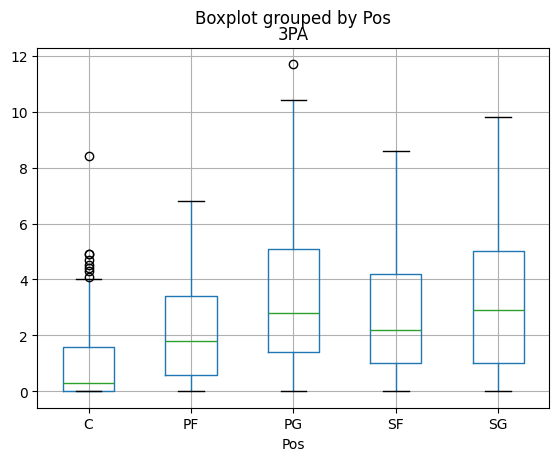

In [16]:
df_total.boxplot(column='3PA', by='Pos')

Dando seguimento a análise exploratória, o grupo optou por gerar o gráfico de correlação, para identificar o nível de correlação entre os atributos, de forma a aprimorar o resto da EDA.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df_total.corr(numeric_only=True).style.background_gradient(cmap= 'magma')

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.074833,0.170416,0.045664,-0.064212,-0.069167,-0.061516,-0.024214,-0.048002,-0.042739,0.011203,-0.063628,-0.060359,-0.010727,-0.024050,-0.079341,-0.076673,0.009462,-0.015500,-0.077146,-0.064781,-0.002237,-0.013364,-0.015723,-0.044665,-0.053977,-0.072995
Age,-0.074833,1.000000,-0.014833,0.036955,0.148576,0.082699,0.079964,0.047975,0.108129,0.092356,0.063143,0.053259,0.054797,0.048722,0.063155,0.057899,0.039504,0.079223,0.039696,0.128734,0.111820,0.158408,0.073599,0.037116,0.086382,0.146796,0.086158
G,0.170416,-0.014833,1.000000,0.708440,0.447479,0.422078,0.401035,0.227139,0.363639,0.350961,0.298531,0.360788,0.346573,0.217909,0.257979,0.265051,0.270809,0.394304,0.242896,0.388750,0.373997,0.301283,0.331643,0.255816,0.286092,0.304082,0.410772
GS,0.045664,0.036955,0.708440,1.000000,0.620140,0.623155,0.598921,0.183114,0.453334,0.449953,0.198778,0.570864,0.567128,0.149206,0.188015,0.471715,0.477324,0.270343,0.326459,0.559477,0.530779,0.488378,0.451795,0.350745,0.493406,0.424501,0.612202
MP,-0.064212,0.148576,0.447479,0.620140,1.000000,0.879826,0.892502,0.257104,0.717749,0.739316,0.380677,0.770444,0.799519,0.229019,0.303647,0.708290,0.704267,0.517255,0.392907,0.760456,0.705325,0.731115,0.707090,0.472163,0.760826,0.771755,0.883060
FG,-0.069167,0.082699,0.422078,0.623155,0.879826,1.000000,0.970532,0.319212,0.680205,0.692173,0.332455,0.938965,0.943854,0.268675,0.325618,0.825214,0.823895,0.443095,0.399450,0.768977,0.713755,0.721295,0.618262,0.449653,0.802733,0.653739,0.990073
FGA,-0.061516,0.079964,0.401035,0.598921,0.892502,0.970532,1.000000,0.178510,0.753514,0.798039,0.336619,0.867803,0.915922,0.159044,0.210018,0.810321,0.796246,0.450396,0.292446,0.711806,0.636582,0.759677,0.637295,0.372490,0.821743,0.629179,0.975543
FG%,-0.024214,0.047975,0.227139,0.183114,0.257104,0.319212,0.178510,1.000000,0.059664,-0.014922,0.243789,0.373612,0.268294,0.830062,0.955454,0.190033,0.221180,0.231390,0.367482,0.314527,0.355614,0.098185,0.161716,0.338683,0.158191,0.311931,0.278991
3P,-0.048002,0.108129,0.363639,0.453334,0.717749,0.680205,0.753514,0.059664,1.000000,0.963469,0.542744,0.387068,0.448924,0.075433,0.232149,0.472702,0.429732,0.436933,-0.065715,0.377497,0.269376,0.552989,0.507882,0.142613,0.545400,0.432425,0.726227
3PA,-0.042739,0.092356,0.350961,0.449953,0.739316,0.692173,0.798039,-0.014922,0.963469,1.000000,0.451745,0.419101,0.489205,0.056308,0.139353,0.498014,0.455397,0.425547,-0.066626,0.397368,0.284074,0.590096,0.526654,0.133833,0.588043,0.442422,0.735563


Com base na leitura dos dados, o grupo realizou um gráfico para saber quais posições possuem mais PTS (Pontos), AST (Assistências) e TRB (Rebotes). Com base no gráfico, entende-se que a posição C (Pivô) tende a realizar mais rebotes e a posição PG (Armador) tende a realizar mais assistências durante a temporada.

In [ ]:
stats = (
    df_total.groupby('Pos')[['PTS', 'AST', 'TRB']]
    .mean()
    .sort_values('PTS', ascending=False)
)

<Figure size 1000x600 with 0 Axes>

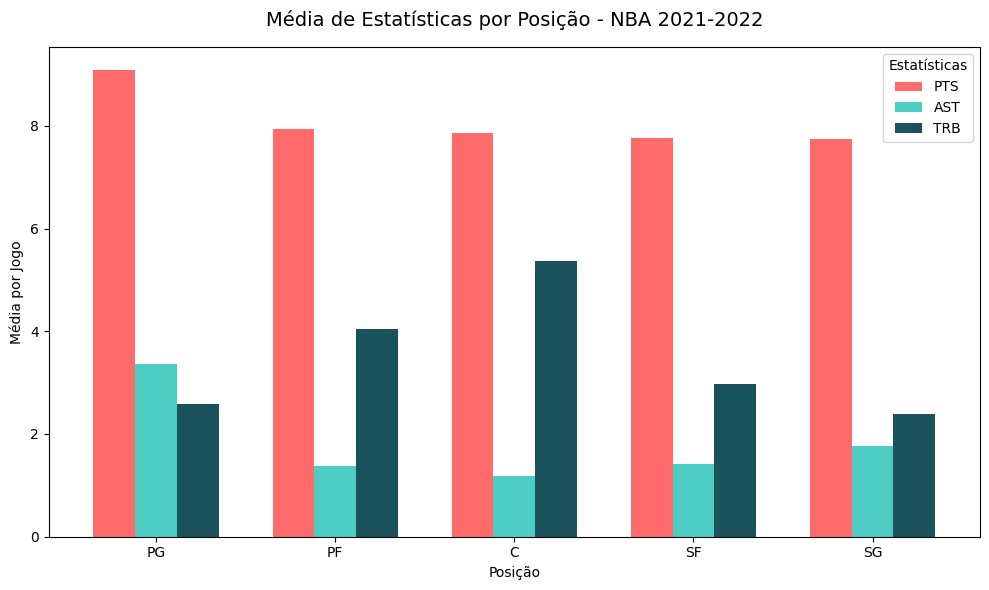

In [ ]:
plt.figure(figsize=(10,6))
stats.plot(kind='bar', figsize=(10,6), width=0.7, color=['#FF6B6B', '#4ECDC4', '#1A535C'])
plt.title('Média de Estatísticas por Posição - NBA 2021-2022', fontsize=14, pad=15)
plt.xlabel('Posição')
plt.ylabel('Média por Jogo')
plt.legend(['PTS', 'AST', 'TRB'], title='Estatísticas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()